# EDA

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importing librarys to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 
import random
import warnings

from IPython.display import IFrame

init_notebook_mode(connected=True)

### Load Data

In [2]:
train = pd.read_csv('train_deleted.csv', dtype={'fullVisitorId': 'str'})

In [3]:
train["totals.transactionRevenue"].replace(0, np.nan, inplace=True)

The dataset is too large, sometime we use df_test to test the code in order to save times.

In [3]:
df_test = pd.read_csv('train_deleted.csv', dtype={'fullVisitorId': 'str'}, nrows = 600000)

### Target Variable Exploration

Since we are predicting the natural log of sum of all transactions of the user, let us sum up the transaction revenue at user level and take a log and then do a scatter plot.

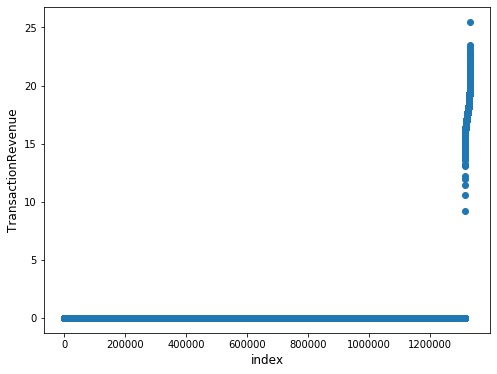

In [12]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')
gdf = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

This confirms the first two lines of the competition overview. The 80/20 rule has proven true for many businesses–only a small percentage of customers produce most of the revenue. As such, marketing teams are challenged to make appropriate investments in promotional strategies. Infact in this case, the ratio is even less.

In [13]:
print(f"Percentage of Revenue generating customers: {(train[train['totals.transactionRevenue'] > 0].shape[0]/train.shape[0])*100}")

Percentage of Revenue generating customers: 1.0837440153786986


A Pie chart can show this variation very clearly.

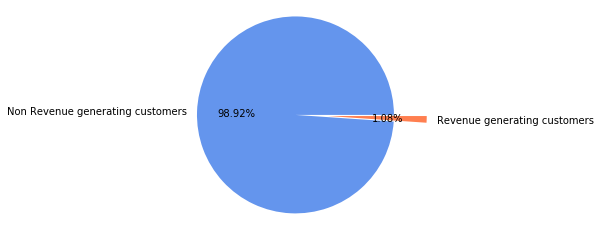

<Figure size 720x720 with 0 Axes>

In [6]:
#Pie-chart

labels = ['Non Revenue generating customers', 'Revenue generating customers']
non_revenue_perc = (train[train['totals.transactionRevenue'] == 0].shape[0]/train.shape[0])*100
revenue_perc = (train[train['totals.transactionRevenue'] > 0].shape[0]/train.shape[0])*100
sizes = [non_revenue_perc, revenue_perc]
explode = (0, 1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct='%0.2f%%', colors = ['cornflowerblue','coral'], radius = 3)
plt.figure(figsize=(10,10))
ax1.axis('equal')
plt.tight_layout()
plt.show()

Only 1.08% of total customers of Gstore actually made purchases.

Now let's see the distribution of target variable.

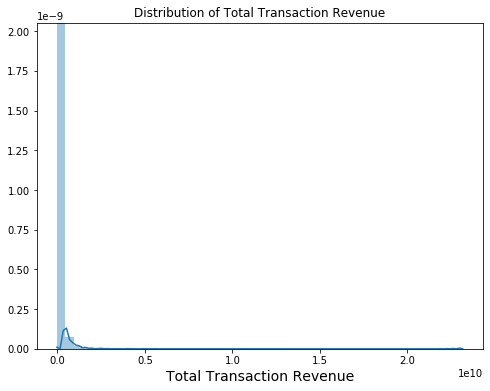

In [7]:
#Distribution of revenue generated
rg = train[train['totals.transactionRevenue'] > 0]['totals.transactionRevenue']
plt.figure(figsize = (8,6))
sns.distplot(rg)
plt.xlabel("Total Transaction Revenue", fontsize = 14)
plt.title("Distribution of Total Transaction Revenue")
plt.show()

It is highly skewed to left side. Applying log on target variable and plotting the distribution:

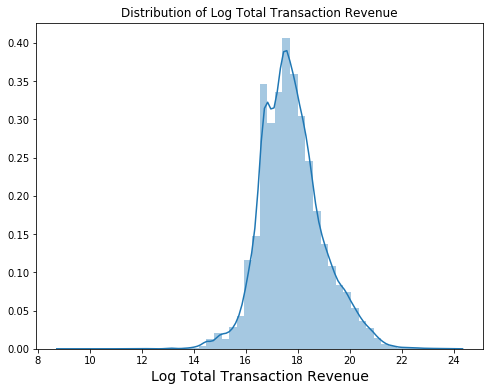

In [8]:
plt.figure(figsize = (8,6))
sns.distplot(rg.apply(np.log1p))
plt.xlabel("Log Total Transaction Revenue", fontsize = 14)
plt.title("Distribution of Log Total Transaction Revenue")
plt.show()

Examining the skew and kurtosis if our log transformed target variable:

In [12]:
from scipy.stats import kurtosis, skew
print(f"Skewness of transction value: {skew(rg.apply(np.log1p))}")
print(f"Kurtosis of transction value: {kurtosis(rg.apply(np.log1p))}")

Skewness of transction value: 0.3809221371038405
Kurtosis of transction value: 1.0575313763811511


Skewness and Kurtosis values indicate log of target variable is almost approximately normally distributed.

### Device Information 

In [15]:
import plotly
import chart_studio.plotly as py
from  plotly.offline import plot

def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Device Browser
cnt_srs = train.groupby('device.browser')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(50, 171, 96, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(50, 171, 96, 0.6)')

# Device Category
cnt_srs = train.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(71, 58, 131, 0.8)')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(71, 58, 131, 0.8)')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(71, 58, 131, 0.8)')

# Operating system
cnt_srs = train.groupby('device.operatingSystem')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10),'rgba(246, 78, 139, 0.6)')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10),'rgba(246, 78, 139, 0.6)')

# Creating two subplots
fig = plotly.subplots.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Non-zero Revenue Count", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Non-zero Revenue Count", "Device Category - Mean Revenue", 
                                          "Device OS - Count", "Device OS - Non-zero Revenue Count", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Device Plots")
plot(fig, filename='device-plots.html')

'device-plots.html'

In [7]:
IFrame(src='./device-plots.html', width=1000, height=1250)

Inferences:

* Chrome and Safari are the top browsers that customers use to come to Gstore.
* It's evident that Gstore users mostly use chrome to shop.
* Device browser distribution looks similar on both the count and count of non-zero revenue plots
* On the device category front, most of the Gstore customers use their Desktop for shopping. Also, most revenue generating customers use Desktop.
* In device operating system, though the number of counts is more from windows, the number of counts where revenue is not zero is more for Macintosh.
* Chrome OS also has higher percentage of non-zero revenue counts
* On the mobile OS side, iOS has more percentage of non-zero revenue counts compared to Android

### Date Exploration

In [16]:
import datetime

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

train['date'] = train['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
cnt_srs = train.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
cnt_srs.columns = ["count", "count of non-zero revenue"]
cnt_srs = cnt_srs.sort_index()
#cnt_srs.index = cnt_srs.index.astype('str')
trace1 = scatter_plot(cnt_srs["count"], 'red')
trace2 = scatter_plot(cnt_srs["count of non-zero revenue"], 'blue')

fig = plotly.subplots.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["Date - Count", "Date - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="Date Plots")
plot(fig, filename='date-plots.html')

'date-plots.html'

In [17]:
IFrame(src='./date-plots.html', width=800, height=800)

The above plot shows the total transaction revenue at any particular point of the time.

Now examining how the trends vary over years, months.

In [22]:
train['date'] = pd.to_datetime(train['date'], format = '%Y%m%d')

In [23]:
train_df_date = train.set_index('date')
train_df_date['year'] = train_df_date.index.year
train_df_date['month'] = train_df_date.index.month
train_df_date['weekday'] = train_df_date.index.weekday_name
#train_df_date.head()

train_df_date_rg = train_df_date[train_df_date['totals.transactionRevenue'] > 0]

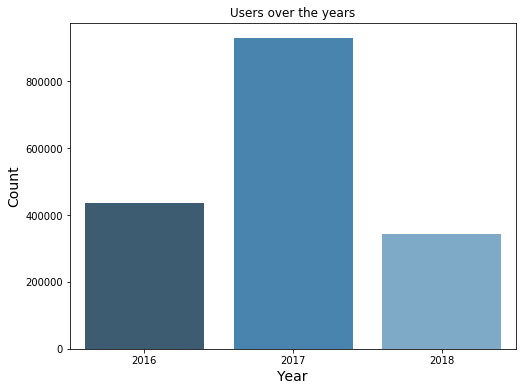

In [24]:
plt.figure(figsize = (8,6))
sns.countplot(train_df_date['year'], palette = 'Blues_d')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.title("Users over the years")
plt.show()

Year 2017 saw more number of visits to the Gstore.

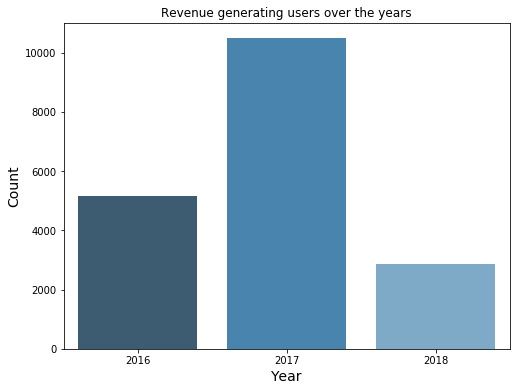

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(train_df_date_rg['year'], palette = 'Blues_d')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.title("Revenue generating users over the years")
plt.show()

Year 2017, had most revenue than 2017 and 2018.

Which month bought more users?

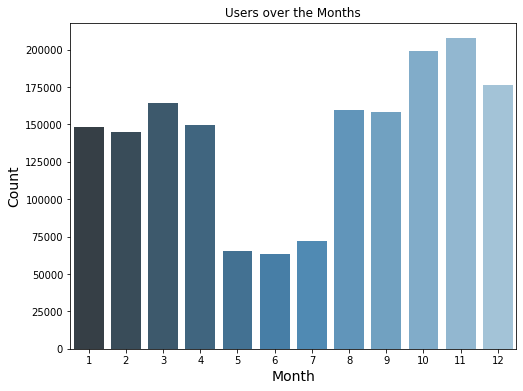

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(train_df_date['month'], palette = 'Blues_d')
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.title("Users over the Months")
plt.show()

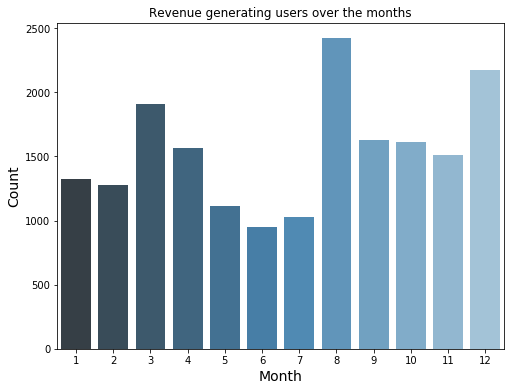

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(train_df_date_rg['month'], palette = 'Blues_d')
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.title("Revenue generating users over the months")
plt.show()

August bought more revenue to Gstore. December also brought more revenue to Gstore. This may be because of the holiday season like Christmas, as most of the buyers are from US.

Inferences:

* We have data from 1 Aug, 2016 to 25 Apr, 2018 in our training dataset
* In Nov 2016 and Dec 2017, though there is an increase in the count of visitors, there is no increase in non-zero revenue counts during that time period (relative to the mean).
* We can see a sharp and transient increase in Mar 2018 in non-zero revenue counts but no obvious change in the count of visitors.

### Geographic Information

In [30]:
# Continent
cnt_srs = train.groupby('geoNetwork.continent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(58, 71, 80, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(58, 71, 80, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(58, 71, 80, 0.6)')

# Sub-continent
cnt_srs = train.groupby('geoNetwork.subContinent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"], 'orange')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'orange')
trace6 = horizontal_bar_chart(cnt_srs["mean"], 'orange')

# Network domain
cnt_srs = train.groupby('geoNetwork.networkDomain')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), 'blue')
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'blue')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'blue')

# Creating two subplots
fig = plotly.subplots.make_subplots(rows=3, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Continent - Count", "Continent - Non-zero Revenue Count", "Continent - Mean Revenue",
                                          "Sub Continent - Count",  "Sub Continent - Non-zero Revenue Count", "Sub Continent - Mean Revenue",
                                          "Network Domain - Count", "Network Domain - Non-zero Revenue Count", "Network Domain - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Geography Plots")
plot(fig, filename='geo-plots.html')

'geo-plots.html'

In [28]:
IFrame(src='./geo-plots.html', width=1200, height=1550)

What countries are Gstore customers from?

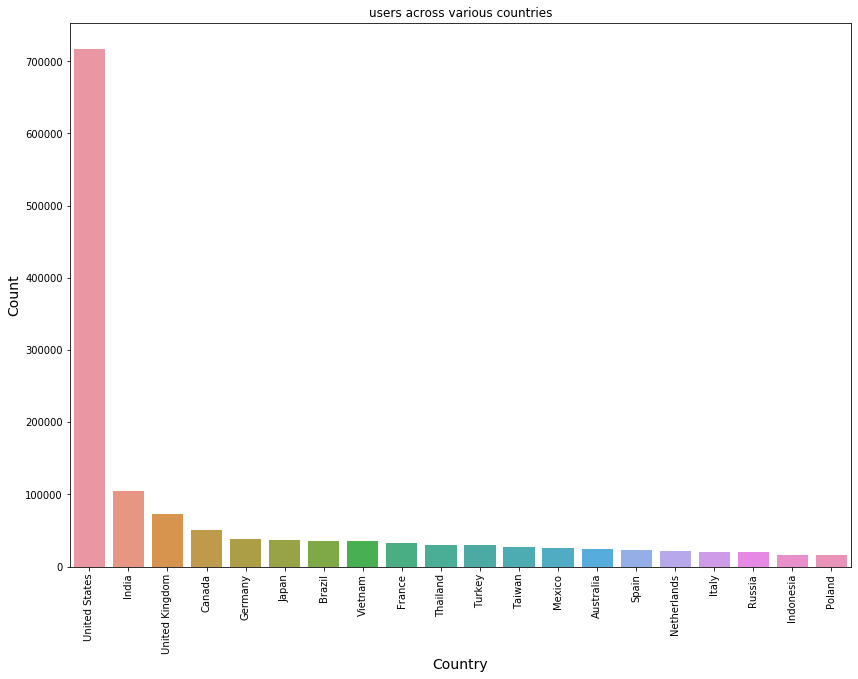

In [34]:
plt.figure(figsize = (14,10))
sns.countplot(x = train['geoNetwork.country'], order = train['geoNetwork.country'].value_counts().head(20).index)
plt.xticks(rotation=90)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.title("users across various countries")
plt.show()

Since most of Gstore customers are from US, it's only logical to see from which cities these customers are from.

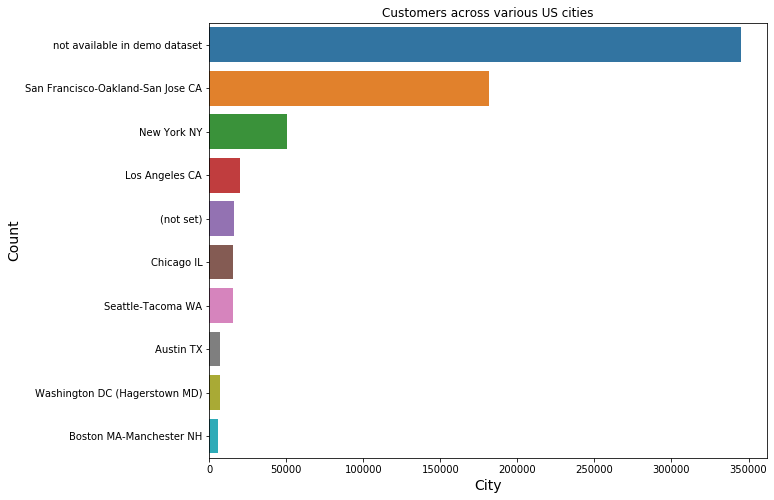

In [35]:
us_traffic = train[train['geoNetwork.country'] == 'United States']

plt.figure(figsize = (10,8))
sns.countplot(y = us_traffic['geoNetwork.metro'], order = us_traffic['geoNetwork.metro'].value_counts().head(10).index)
plt.xlabel("City", fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.title("Customers across various US cities")
plt.show()

Inferences:

* On the continent plot, we can see that America has both higher number of counts as well as highest number of counts where the revenue is non-zero
* Gstore sees its users mainly from US,India,UK and Canada.
* Most of the users of Gstore are from San Jose, New York city and Los Angeles.
* Though Asia and Europe has high number of counts, the number of non-zero revenue counts from these continents are comparatively low.
* We can infer the first two points from the sub-continents plot too.
* If the network domain is "unknown.unknown" rather than "(not set)", then the number of counts with non-zero revenue tend to be lower.

Now what does Gstore customers look on a map?

In [4]:
tmp = train['geoNetwork.country'].value_counts()
country_visits = pd.DataFrame(data={'geoNetwork_country': tmp.values}, index=tmp.index).reset_index()
country_visits.columns = ['Country', 'Visits']

In [5]:
colorscale = [[0, 'rgb(102,194,165)'], [0.005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

def plot_country_map(data, location, z, legend, title, colormap='Rainbow'):
    data = dict(type = 'choropleth', 
                colorscale = colorscale,
                autocolorscale = False,
                reversescale = False,
               locations = data[location],
               locationmode = 'country names',
               z = data[z], 
               text = data[z],
               colorbar = {'title':legend})
    layout = dict(title = title, 
                 geo = dict(showframe = False, 
                         projection = {'type': 'natural earth'}))
    choromap = go.Figure(data = [data], layout=layout)
    iplot(choromap)

In [6]:
plot_country_map(country_visits, 'Country', 'Visits', 'Visits', 'Visits per country')
plt.show()

Red indicates more users and green indiactes less number or no users.

Let's see how revenue generating customers would look on a map.

In [7]:
revenue_by_country = train.groupby('geoNetwork.country')['totals.transactionRevenue'].sum().reset_index()

plot_country_map(revenue_by_country, 'geoNetwork.country', 'totals.transactionRevenue', 'Transaction Revenue', 'Revenue per country')
plt.show()

Red indicates more revenue as compared to green.

### Traffic Source

In [42]:
# Continent
cnt_srs = train.groupby('trafficSource.source')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'green')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'green')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'green')

# Sub-continent
cnt_srs = train.groupby('trafficSource.medium')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"], 'purple')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'purple')
trace6 = horizontal_bar_chart(cnt_srs["mean"], 'purple')

# Creating two subplots
fig = plotly.subplots.make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Traffic Source - Count", "Traffic Source - Non-zero Revenue Count", "Traffic Source - Mean Revenue",
                                          "Traffic Source Medium - Count",  "Traffic Source Medium - Non-zero Revenue Count", "Traffic Source Medium - Mean Revenue"
                                          ])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1000, width=1200, paper_bgcolor='rgb(233,233,233)', title="Traffic Source Plots")
plot(fig, filename='traffic-source-plots.html')

'traffic-source-plots.html'

In [8]:
IFrame(src='./traffic-source-plots.html', width=1000, height=1000)

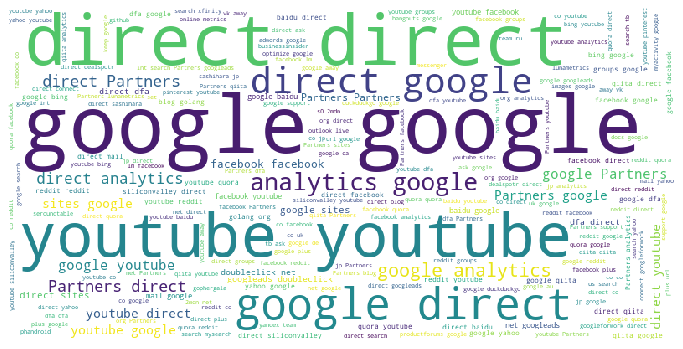

In [9]:
source = train['trafficSource.source'].fillna('')
wordcloud_source = WordCloud(width=800, height=400, background_color="white").generate(' '.join(source))
plt.figure( figsize=(12,9))
plt.imshow(wordcloud_source)
plt.axis("off")
plt.show()

Inferences:

* In the traffic source plot, though Youtube has high number of counts in the dataset, the number of non-zero revenue counts are very less.
* Google plex has a high ratio of non-zero revenue count to total count in the traffic source plot.
* On the traffic source medium, "organic" has more number of non-zero revenue count compared to "referral" medium.

### Visitor Profile

In [47]:
# Page views
cnt_srs = train.groupby('totals.pageviews')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(60), '#ff0000')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), '#ff0000')
trace5 = horizontal_bar_chart(cnt_srs["mean"].head(60), '#ff0000')

# Hits
cnt_srs = train.groupby('totals.hits')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", 'mean']
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace3 = horizontal_bar_chart(cnt_srs["count"].head(60), '#9933cc')
trace4 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), '#9933cc')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(60), '#9933cc')

# Creating two subplots
fig = plotly.subplots.make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Total Pageviews - Count", "Total Pageviews - Non-zero Revenue Count", "Total Pageviews - Mean Revenue",
                                          "Total Hits - Count",  "Total Hits - Non-zero Revenue Count", "Total Hits - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Visitor Profile Plots")
plot(fig, filename='visitor-profile-plots.html')

'visitor-profile-plots.html'

In [34]:
IFrame(src='./visitor-profile-plots.html', width=950, height=1250)

Inferences:

* Both these variables look very predictive
* Count plot shows decreasing nature i.e. we have a very high total count for less number of hits and page views per visitor transaction and the overall count decreases when the number of hits per visitor transaction increases.
* On the other hand, we can clearly see that when the number of hits / pageviews per visitor transaction increases, we see that there is a high number of non-zero revenue counts.